# Entendendo as características dos **Resultado da Arrecadação**

____


# Arrecadação de IR e IPI detalhada

**Dicionário de Dados Arrecadação de IR e IPI detalhada**

O arquivo relaciona as informações que possibilitam organizar, classificar, relacionar e inferir novos dados sobre o conjunto de dados da Arrecadação de IR e IPI detalhada.

Acessado em 27/08/2025: https://www.gov.br/receitafederal/dados/arrecadacao-ir-ipi-metadados.pdf

**Arrecadação de IR e IPI detalhada**

Contém os dados de arrecadação decendial do Imposto sobre a Renda (IR) e do Imposto sobre Produtos Industrializados (IPI), discriminados por arrecadação bruta, os respectivos eventos que afetam essa arrecadação bruta e a arrecadação líquida, valor este último passível de repasse aos Fundos de Participação dos Estados e do Municípios, FPM e FPE, de acordo com dispositivo constitucional.

In [2]:
# Arrecadação de IR e IPI detalhada

import pandas as pd

# Caminho do arquivo CSV
caminho_arquivo = r'C:\Users\merc-\OneDrive\Documentos\Logo Ali\2025\Analise_Dados\data\arrecadacao-ir-ipi.csv' 

# Importar o CSV
df = pd.read_csv(caminho_arquivo, encoding='latin1', sep=';')

# Exibir as primeiras linhas
df.head()

,Tributo,Ano,Mês,Decêndio,Arrecadação Bruta,Retificação,Compensação,Restituição,Outros,Arrecadação Líquida
0,IPI,2019,Janeiro,1º decêndio,"1.184.376.191,13",NaN,"-22.835.343,52","-445.212,05","3.899.508,36","1.164.995.143,92"
1,IPI,2019,Janeiro,2º decêndio,"505.362.810,07","1.508.551.632,45","-91.511.158,02","-7.933.945,05","-1.923.033.857,43","-8.564.517,98"
2,IPI,2019,Janeiro,3º decêndio,"3.124.520.357,20","23.446,58","-176.542.912,08","-42.858.973,78","127.922.587,68","3.033.064.505,60"
3,IPI,2019,Fevereiro,1º decêndio,"846.117.580,21","1.832.646,16","-81.701.322,01","-21.654,92","2.969.183,40","769.196.432,84"
4,IPI,2019,Fevereiro,2º decêndio,"636.136.421,98","-111.724,14","-59.915.844,65","-4.456.015,80","50.000.414,64","621.653.252,03"


In [9]:
# Exibir informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tributo              468 non-null    object 
 1   Ano                  468 non-null    int64  
 2   Mês                  468 non-null    object 
 3   Decêndio             468 non-null    object 
 4   Arrecadação Bruta    468 non-null    float64
 5   Retificação          466 non-null    float64
 6   Compensação          468 non-null    float64
 7   Restituição          468 non-null    float64
 8   Outros               468 non-null    float64
 9   Arrecadação Líquida  468 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 36.7+ KB


In [11]:
df.shape
print(f"O DataFrame tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

O DataFrame tem 468 linhas e 10 colunas.


### Limpeza dos dados do DataFrame DataFrame

In [30]:
# Limpezando os dados do DataFrame df

# 1. Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# 2. Substituindo vírgulas por ponto e removendo pontos de milhar nas colunas numéricas
colunas_valores = [
    'Arrecadação Bruta', 'Retificação', 'Compensação',
    'Restituição', 'Outros', 'Arrecadação Líquida'
]
# Converter colunas para float
for col in colunas_valores:
    df[col] = (
        df[col]
        .astype(str) # garantindo que os dados são string para manipulação
        .str.replace('.', '', regex=False)   # removendo pontos de milhar
        .str.replace(',', '.', regex=False)  # trocando vírgula decimal por ponto
        .replace('nan', None) # tratando strings 'nan' como None
        .astype(float) # convertendo para float
    )

# 3. Conferir o resultado da limpeza

print("Informações do DataFrame após limpeza:\n")
df.info()

print(f"\nO DataFrame tem {df.shape[0]} linhas e {df.shape[1]} colunas.\n")
df.head()

print("------------------------------------")
# 4. Tratando valores ausentes (NaN) se necessário
# Exemplo: preencher com 0 ou manter como NaN
# df[colunas_valores] = df[colunas_valores].fillna(0)

# Tratando valores ausentes (NaN) nas colunas numéricas, preenchendo com 0

print("Valores ausentes antes do tratamento:\n", df[colunas_valores].isnull().sum())
df[colunas_valores] = df[colunas_valores].fillna(0)

# Conferir se ainda existem valores ausentes
print("Valores ausentes após tratamento:\n", df[colunas_valores].isnull().sum())

# Exibir as primeiras linhas após o tratamento
print("Primeiras linhas do DataFrame após o tratamento:")
df.head()

Informações do DataFrame após limpeza:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tributo              468 non-null    object 
 1   Ano                  468 non-null    int64  
 2   Mês                  468 non-null    object 
 3   Decêndio             468 non-null    object 
 4   Arrecadação Bruta    468 non-null    float64
 5   Retificação          468 non-null    float64
 6   Compensação          468 non-null    float64
 7   Restituição          468 non-null    float64
 8   Outros               468 non-null    float64
 9   Arrecadação Líquida  468 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 36.7+ KB

O DataFrame tem 468 linhas e 10 colunas.

------------------------------------
Valores ausentes antes do tratamento:
 Arrecadação Bruta      0
Retificação            0
Compensação            

,Tributo,Ano,Mês,Decêndio,Arrecadação Bruta,Retificação,Compensação,Restituição,Outros,Arrecadação Líquida
0,IPI,2019,Janeiro,1º decêndio,1.184376e+93,0.000000e+00,-2.283534e+61,-4.452121e+37,3.899508e+48,1.164995e+93
1,IPI,2019,Janeiro,2º decêndio,5.053628e+76,1.508552e+93,-9.151116e+61,-7.933945e+48,-1.923034e+93,-8.564518e+48
2,IPI,2019,Janeiro,3º decêndio,3.124520e+76,2.344658e+28,-1.765429e+76,-4.285897e+61,1.279226e+76,3.033065e+76
3,IPI,2019,Fevereiro,1º decêndio,8.461176e+76,1.832646e+48,-8.170132e+61,-2.165492e+28,2.969183e+37,7.691964e+76
4,IPI,2019,Fevereiro,2º decêndio,6.361364e+76,-1.117241e+37,-5.991584e+61,-4.456016e+37,5.000041e+61,6.216533e+76


1 - Análise **Descritiva** para conhecer o que está acontecendo na organização e entender tendências e causas subjacentes de tais ocorrências.

In [ ]:
# Análise Descritiva da base de dados

# Estatísticas descritivas das colunas numéricas
descricao_numerica = df.describe()

# Contagem de valores únicos e valores ausentes por coluna
valores_unicos = df.nunique()
valores_ausentes = df.isnull().sum()

# Exibir resultados
print("Estatísticas Descritivas das Colunas Numéricas:\n", descricao_numerica)
print("\nValores Únicos por Coluna:\n", valores_unicos)
print("\nValores Ausentes por Coluna:\n", valores_ausentes)

Estatísticas Descritivas das Colunas Numéricas:
                Ano  Arrecadação Bruta    Retificação   Compensação  \
count   468.000000       4.680000e+02   4.680000e+02  4.680000e+02   
mean   2021.769231      7.042033e+111  2.189268e+109 -1.154757e+92   
std       1.889380      1.256387e+112  4.736110e+110  6.954812e+92   
min    2019.000000       3.617089e+61  -9.465372e+61 -4.170260e+93   
25%    2020.000000       1.121463e+93  -2.853523e+36 -2.802889e+76   
50%    2022.000000       3.081126e+93   4.602913e+37 -3.200949e+61   
75%    2023.000000      1.294545e+112   6.731414e+48  6.645018e+61   
max    2025.000000      6.935293e+112  1.024577e+112  2.959195e+93   

         Restituição        Outros  Arrecadação Líquida  
count   4.680000e+02  4.680000e+02         4.680000e+02  
mean  -9.659003e+109  2.945754e+91        6.787813e+111  
std    1.043397e+111  4.089111e+92        1.189140e+112  
min   -1.184229e+112 -6.573123e+93        -8.564518e+48  
25%    -1.138491e+76  4.485004

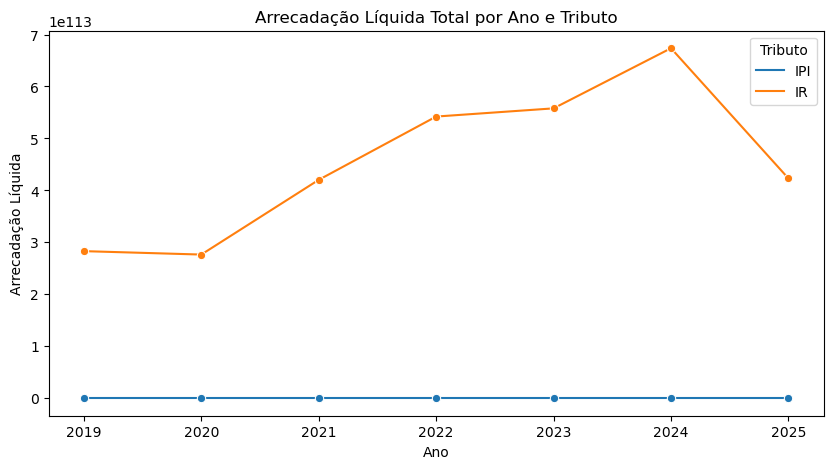

In [34]:
# Análise descritiva detalhada da base de dados

import matplotlib.pyplot as plt
import seaborn as sns

# Comparação entre IR e IPI ao longo dos anos

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df.groupby(['Ano', 'Tributo'])['Arrecadação Líquida'].sum().reset_index(),
    x='Ano', y='Arrecadação Líquida', hue='Tributo', marker='o'
)
plt.title('Arrecadação Líquida Total por Ano e Tributo')
plt.ylabel('Arrecadação Líquida')
plt.xlabel('Ano')
plt.show()

2 - Análise **Preditiva** para determinar o que é mais provável de acontecer no futuro.

3 - Análise *Prescritiva* com base para conhecer o que está acontecendo, bem como o que deve vir a acontecer, e tomar decisões para garantir o melhor desempenho possível.